In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('Social_Network_Ads.csv')


In [3]:
df = df.iloc[:, 2:] 

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
288,41,79000,0
126,42,65000,0
197,20,36000,0
37,30,49000,0
26,49,28000,1


### Train test split

In [5]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

x_train.shape , x_test.shape

((280, 2), (120, 2))

### StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#FIt the scaler to the train dataset , it will learn parameters
scaler.fit(x_train)

#Transform train and test data set 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [9]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [10]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [11]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [12]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effect of Scalling

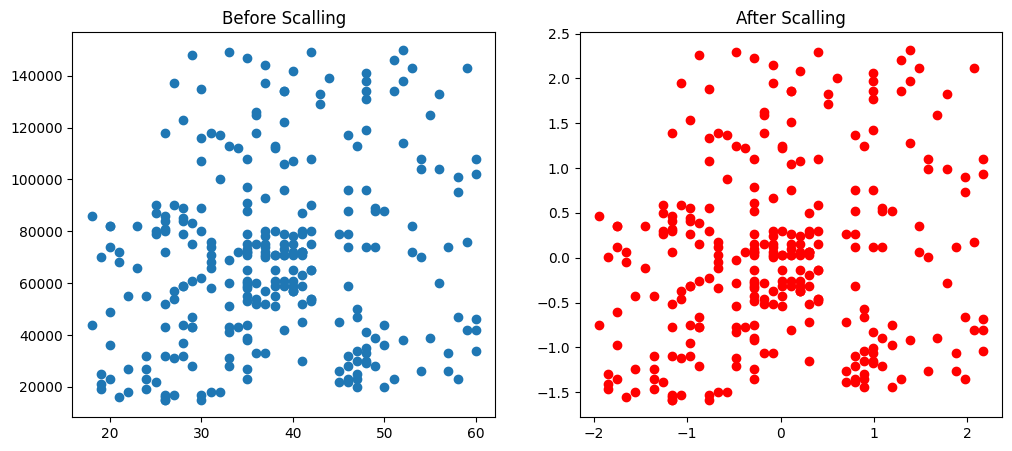

In [13]:
fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scalling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='Red')
ax2.set_title('After Scalling')

plt.show()

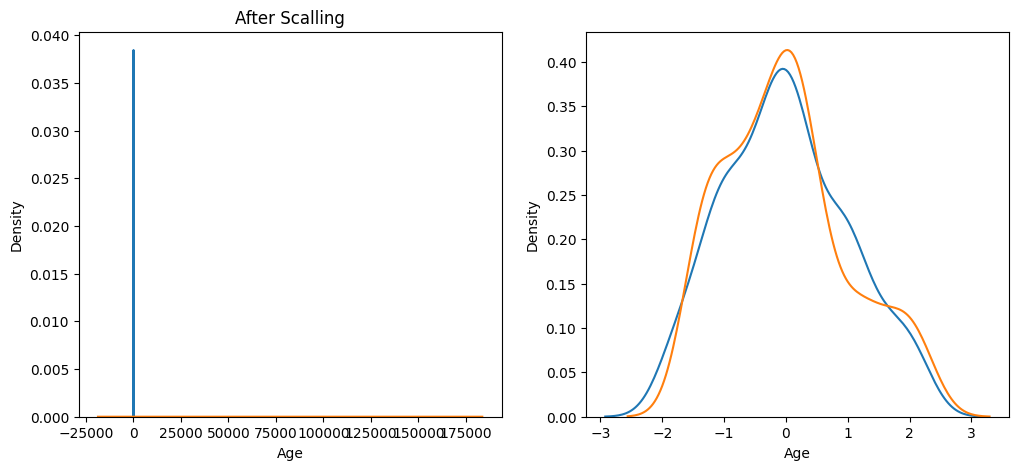

In [14]:
fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#Befroe Scalling
ax1.set_title("Before Scalling")
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

#After Scalling
ax1.set_title("After Scalling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

### Comparison of distribution 

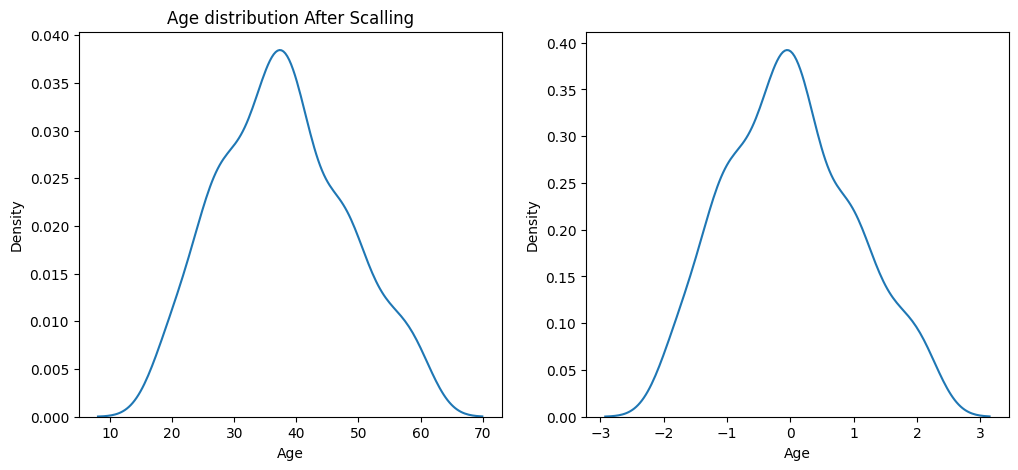

In [15]:
fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#Befroe Scalling
ax1.set_title("Age Distribution Before Scalling")
sns.kdeplot(x_train['Age'],ax=ax1)

#After Scalling
ax1.set_title("Age distribution After Scalling")
sns.kdeplot(x_train_scaled['Age'],ax=ax2)

plt.show()

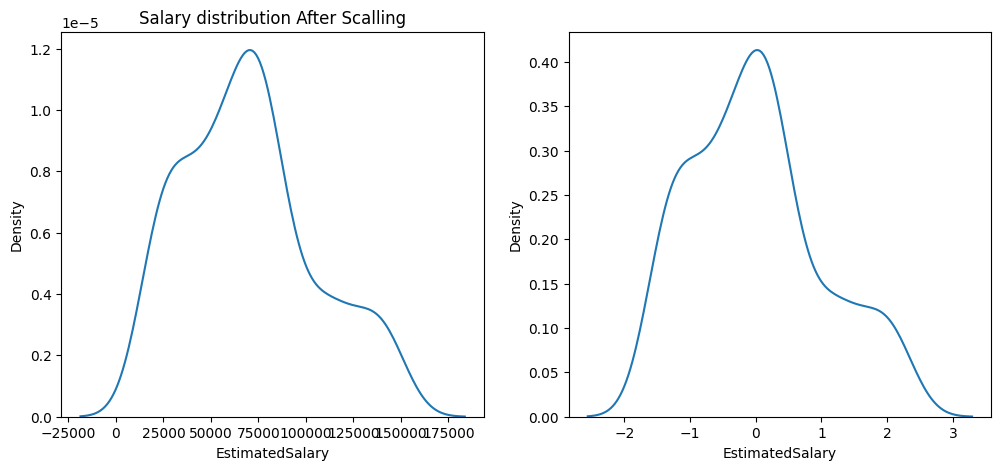

In [16]:
fig ,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#Befroe Scalling
ax1.set_title("Salary Distribution Before Scalling")
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

#After Scalling
ax1.set_title("Salary distribution After Scalling")
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

<h1> Why Scalling is important ? </h1>

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr=LogisticRegression()
lr_scaled = LogisticRegression()

In [19]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score

In [23]:
print('Actual ',accuracy_score(y_test,y_pred))
print('Scaled ',accuracy_score(y_test,y_pred_scaled))

Actual  0.875
Scaled  0.8666666666666667


In [24]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<h1> Effect of Outliers </h1>


In [36]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalry':[1000,250000,300000],'Purchased':[0,1,1]}))

AttributeError: 'DataFrame' object has no attribute 'append'